## KNN classifier 실행

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np 

# 데이터 만들기
d_data = list(zip(dach_length, dach_height))
d_label = np.zeros(len(d_data))
s_data = list(zip(samo_length, samo_height))
s_label = np.ones(len(s_data))

labels = np.hstack([d_label, s_label])
dogs = np.vstack([d_data, s_data])
print(labels)
print(dogs)


[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[[77 25]
 [78 28]
 [85 19]
 [83 30]
 [73 21]
 [77 22]
 [73 17]
 [80 35]
 [75 56]
 [77 57]
 [86 50]
 [86 53]
 [79 60]
 [83 53]
 [83 49]
 [88 61]]


In [ ]:
# label class 정의 
dog_classes = {0:'Dachshund', 1:'Samoyed'}

# 모델 정의 
k = 1
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(dogs, labels)

# 예측
newdata = [[82, 40]]
y_pred = knn.predict(newdata)
print('데이터 >', newdata, '판정 결과 >', dog_classes[y_pred[0]])
y_pred

데이터 > [[82, 40]] 판정 결과 > Dachshund


array([0.])

In [ ]:
# 모델 정의 
k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(dogs, labels)

# 예측
newdata = [[82, 40]]
y_pred = knn.predict(newdata)
print('데이터 >', newdata, '판정 결과 >', dog_classes[y_pred[0]])
y_pred

데이터 > [[82, 40]] 판정 결과 > Dachshund


array([0.])

In [ ]:
# 모델 정의 
k = 9
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(dogs, labels)

# 예측
newdata = [[82, 40]]
y_pred = knn.predict(newdata)
print('데이터 >', newdata, '판정 결과 >', dog_classes[y_pred[0]])
y_pred

데이터 > [[82, 40]] 판정 결과 > Samoyed


array([1.])

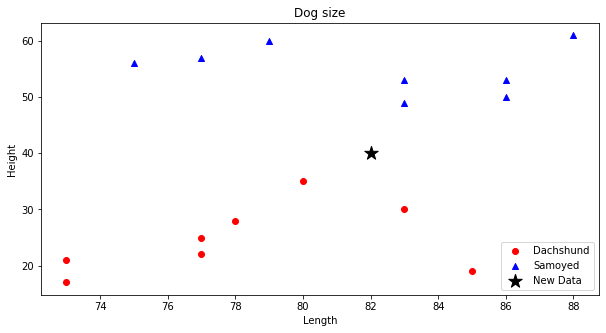

In [ ]:
newdata_length = [82]
newdata_height = [40]

# Plot
fig = plt.figure(figsize=(10, 5))
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(samo_length, samo_height,c='blue',marker='^', label='Samoyed')
plt.scatter(newdata_length, newdata_height, marker='*', s=200, c='k', label='New Data')

plt.xlabel('Length')              
plt.ylabel('Height')              
plt.title("Dog size")
plt.legend(loc='lower right')

plt.show()

# Iris data 

In [ ]:
from sklearn.datasets import load_iris 
import pandas as pd

iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
iris.data.shape

(150, 4)

In [ ]:
X = iris.data 
y = iris.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

k = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)
y_pred 

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0,
       2])

In [ ]:
y_test 

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0,
       2])

In [ ]:
# 정확도 테스트
(y_pred == y_test).mean()

0.9555555555555556

In [ ]:
def iris_knn(X, y, k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return f'Accuracy rate: {(y_test == y_pred).mean():.04f}'

iris_knn(X, y, k = 3)

'Accuracy rate: 0.9778'

In [ ]:
# 새로운 데이터를 제시해 보자. 
X = [[4, 2, 1.3, 0.4], 
     [4, 3, 3.2, 2.2]]

knn.predict(X)

array([0, 1])

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris['target_names'][knn.predict(X)]

array(['setosa', 'versicolor'], dtype='<U10')

In [ ]:
from sklearn import metrics 

y_pred_all = knn.predict(iris.data)
y_pred_all 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
score = metrics.accuracy_score(iris.target, y_pred_all)
print('n_neighbors가 {}일때 정확도: {:.3f}'.format(k, score))

n_neighbors가 3일때 정확도: 0.967


In [ ]:
for k in range(3, 10, 2):
    score = metrics.accuracy_score(iris.target, y_pred_all)
    print('n_neighbors가 {}일때 정확도: {:.3f}'.format(k, score))
    

n_neighbors가 3일때 정확도: 0.967
n_neighbors가 5일때 정확도: 0.967
n_neighbors가 7일때 정확도: 0.967
n_neighbors가 9일때 정확도: 0.967


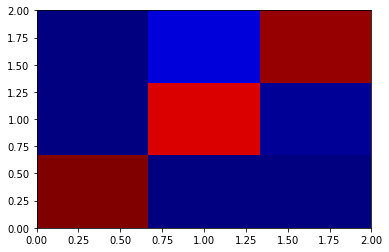

In [ ]:
# 혼동 행렬 plot 
import matplotlib.pyplot as plt 
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.jet)
plt.show()

In [ ]:
# 혼동행렬 (Confusion Matrix)
from sklearn.metrics import confusion_matrix 
conf_mat = confusion_matrix(y_true = iris.target, y_pred=y_pred_all)
conf_mat

array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  1, 49]], dtype=int64)

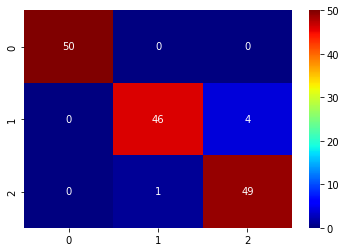

In [ ]:
import seaborn as sns 
sns.heatmap(conf_mat, annot=True, cmap=plt.cm.jet)
plt.show()

In [ ]:
target = np.array([0] * 10 + [1] * 10)  # 실제값
print(target)  # 10개의 0(Negative), 10개의 1(Positive)를 가짐
pred = np.array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])
print(pred)  # 예측 값


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(target, pred)

array([[7, 3],
       [2, 8]], dtype=int64)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 
print('정밀도(Precision) : ', precision_score(target, pred))
print('재현율(Recall) : ', recall_score(target, pred))
print('정확도(Accuracy) : ', accuracy_score(target, pred))


정밀도(Precision) :  0.7272727272727273
재현율(Recall) :  0.8
정확도(Accuracy) :  0.75


In [ ]:
from sklearn.metrics import f1_score 
print('F1 Score :', f1_score(target, pred))

F1 Score : 0.761904761904762


# K-means Clustering 

In [ ]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# 닥스 훈트의 몸 길이와 몸 높이
dach_length = [77, 78, 85, 83, 73, 77, 73, 80]
dach_height = [25, 28, 19, 30, 21, 22, 17, 35]

# 사모예드의 몸 길이와 몸 높이
samo_length = [75, 77, 86, 86, 79, 83, 83, 88]
d_data = list(zip(dach_length, dach_height))
d_label = np.zeros(len(d_data))   # 닥스훈트는 0으로 레이블링
s_data = list(zip(samo_length, samo_height))
s_label = np.ones(len(s_data))   # 사모예드는 1로 레이블링


dog_data = np.vstack([d_data, s_data])
dog_length = dog_data[:, 0]
dog_height = dog_data[:, 1]
dog_length, dog_height 


(array([77, 78, 85, 83, 73, 77, 73, 80, 75, 77, 86, 86, 79, 83, 83, 88]),
 array([25, 28, 19, 30, 21, 22, 17, 35, 56, 57, 50, 53, 60, 53, 49, 61]))

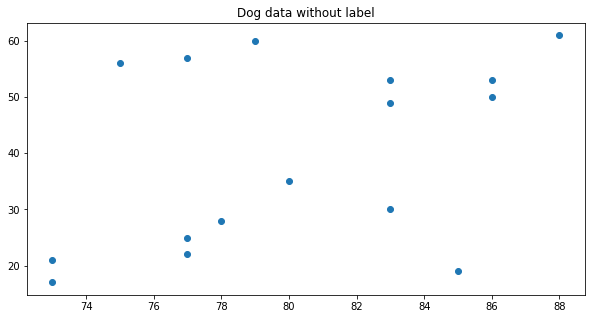

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.scatter(dog_length, dog_height)
plt.title('Dog data without label')
plt.show()

In [ ]:
from sklearn import cluster 

k = 3           # k개의 그룹으로 클러스터링하겠다.
model = cluster.KMeans(n_clusters = k)
model.fit(dog_data)
pred_label = model.predict(dog_data)
pred_label

array([2, 0, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1])

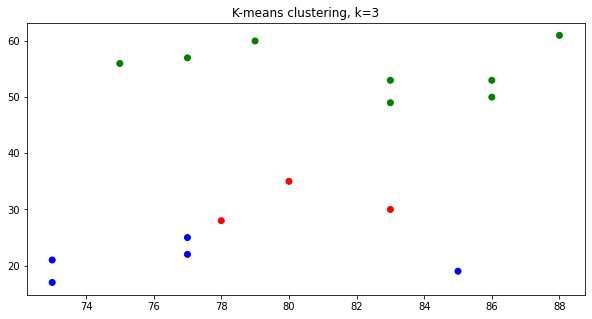

In [ ]:
fig = plt.figure(figsize=(10, 5))

colors = np.array(['red','green','blue'])
plt.scatter(dog_length, dog_height, color=colors[pred_label])
plt.title('K-means clustering, k={}'.format(k))
plt.show()

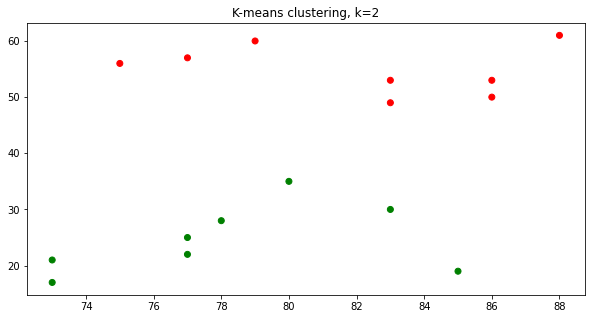

In [ ]:
def kmeans_predict_plot(dog_data, k):
    model = cluster.KMeans(n_clusters = k)
    model.fit(dog_data)
    pred_label = model.predict(dog_data)
    pred_label

    fig = plt.figure(figsize=(10, 5))

    colors = np.array(['red','green','blue'])
    plt.scatter(dog_length, dog_height, color=colors[pred_label])
    plt.title('K-means clustering, k={}'.format(k))
    plt.show()
    
kmeans_predict_plot(dog_data, k=2)

## K-menas Clustering 원리 

In [ ]:
#####################################################################
# 비지도학습 : iris 예제 (K-means Clustering)
#####################################################################
# sklearn 라이브러리에 포함된 datasets 모듈에서 아이리스 데이터를 로드.
from sklearn import datasets
iris = datasets.load_iris()
iris.data
# sepal length와 width 두 가지 feature만을 사용하도록 하겠음
# 데이터로부터 두 feature만을 뽑아내어 산점도를 그려 봄(x축-length, y축-width)
from matplotlib import pyplot as plt
x = iris.data[:, 0]   # sepal length
y = iris.data[:, 1]   # sepal width

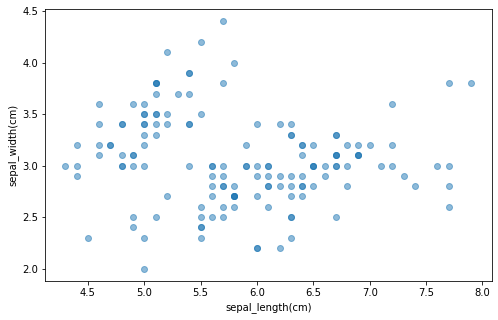

In [ ]:
fig = plt.figure(figsize=(8, 5))

plt.scatter(x, y, alpha=0.5)
plt.xlabel('sepal_length(cm)')
plt.ylabel('sepal_width(cm)')
plt.show()

[[6.80728907 3.32315545]
 [5.33010161 3.72672553]
 [5.11666523 3.0154555 ]]


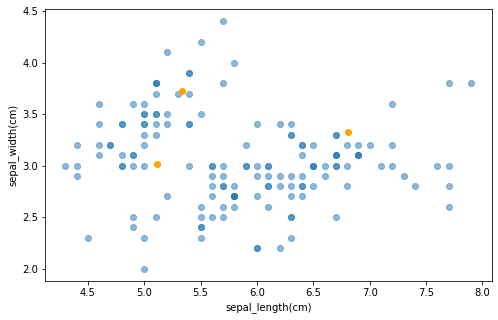

In [ ]:
# STEP 1: 랜덤으로 k개의 좌표 생성
k = 3                    
np.random.seed(123)                  
centroids_x = np.random.uniform(min(x), max(x), k) 
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = np.array(list(zip(centroids_x, centroids_y)))

print(centroids)

fig = plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5)
plt.scatter(centroids_x, centroids_y, color='orange')
plt.xlabel('sepal_length(cm)')
plt.ylabel('sepal_width(cm)')
plt.show()


[1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 1. 1. 2. 1. 2.
 1. 2. 0. 0. 0. 2. 0. 2. 0. 2. 0. 2. 2. 2. 2. 0. 2. 0. 2. 2. 0. 2. 1. 0.
 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 1. 0. 0. 2. 2. 2. 0. 2. 2. 2. 2.
 2. 0. 2. 2. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 2.
 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 0. 0. 0. 0. 0. 2.]


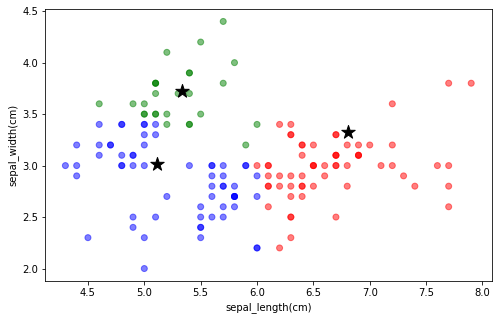

In [ ]:
# STEP 2: centroids에 가까운 데이터들을 계산하고 할당 
def distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))

points = np.array(list(zip(x, y)))
labels = np.zeros(len(points))

for i, point in enumerate(points):
    distances = [distance(point, centroids[0]), distance(point, centroids[1]), distance(point, centroids[2])]
    distances = np.array(distances)
    
    labels[i] = distances.argmin()

print(labels)

fig = plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, color=colors[labels.astype('int')])
plt.scatter(centroids_x, centroids_y, color='black', marker='*', s=200)
plt.xlabel('sepal_length(cm)')
plt.ylabel('sepal_width(cm)')
plt.show()

[[6.65967742 2.98870968]
 [5.3        3.68148148]
 [5.25409836 2.85081967]]
[[6.65967742 2.98870968]
 [5.3        3.68148148]
 [5.25409836 2.85081967]]


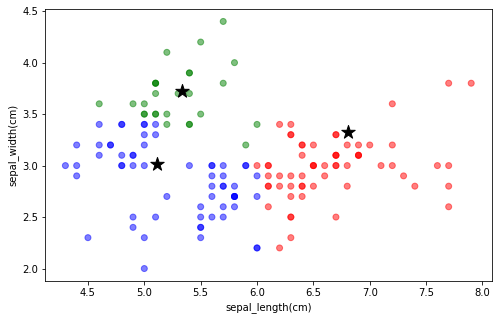

In [ ]:
# STEP 3: Udate Centroids -- 각 그룹의 중심점으로 옮기기 
import copy 
centroids_old = copy.deepcopy(centroids)

for i in range(k):
    centroids[i] = points[labels==i].mean(axis=0)
print(centroids)
print(centroids_old)
    
fig = plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, color=colors[labels.astype('int')])
plt.scatter(centroids_x, centroids_y, color='black', marker='*', s=200)
plt.xlabel('sepal_length(cm)')
plt.ylabel('sepal_width(cm)')
plt.show()

============================================= 실행횟수 1
# 현재 centroids =  [[7.83075111 2.94108204]
 [6.76538706 2.82362724]
 [6.03135485 3.7497193 ]]


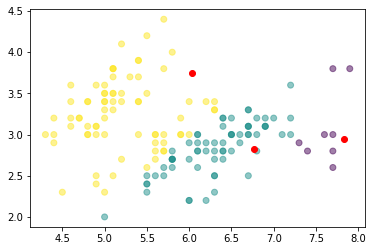

============================================= 실행횟수 2
# 현재 centroids =  [[7.625      3.0875    ]
 [6.32238806 2.82985075]
 [5.22533333 3.25733333]]


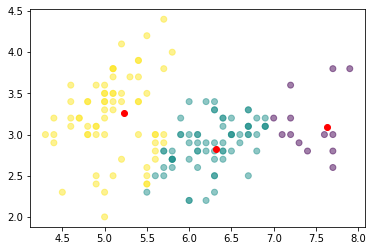

============================================= 실행횟수 3
# 현재 centroids =  [[7.43846154 3.13076923]
 [6.26956522 2.8826087 ]
 [5.10588235 3.22058824]]


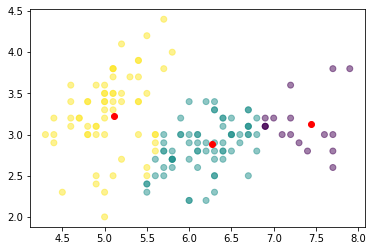

============================================= 실행횟수 4
# 현재 centroids =  [[7.31176471 3.12941176]
 [6.18571429 2.85428571]
 [5.06666667 3.26349206]]


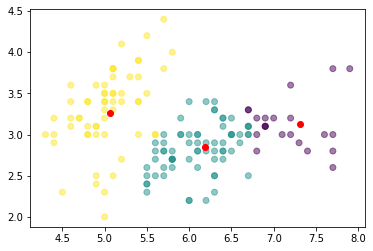

============================================= 실행횟수 5
# 현재 centroids =  [[7.18636364 3.12727273]
 [6.10724638 2.82608696]
 [5.03389831 3.30169492]]


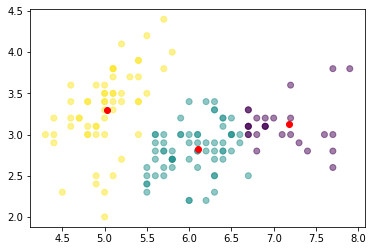

============================================= 실행횟수 6
# 현재 centroids =  [[7.0962963  3.11481481]
 [6.0469697  2.81363636]
 [5.01403509 3.3122807 ]]


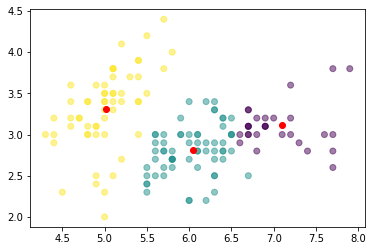

============================================= 실행횟수 7
# 현재 centroids =  [[7.06206897 3.10344828]
 [6.0296875  2.809375  ]
 [5.01403509 3.3122807 ]]


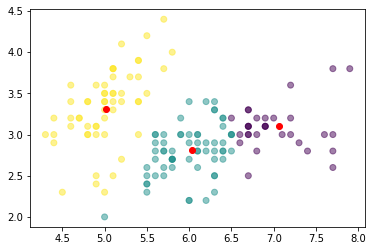

============================================= 실행횟수 8
# 현재 centroids =  [[7.03225806 3.08709677]
 [5.9952381  2.7952381 ]
 [5.01428571 3.33571429]]


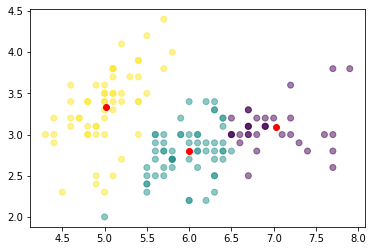

============================================= 실행횟수 9
# 현재 centroids =  [[6.98529412 3.07941176]
 [5.97       2.785     ]
 [5.01428571 3.33571429]]


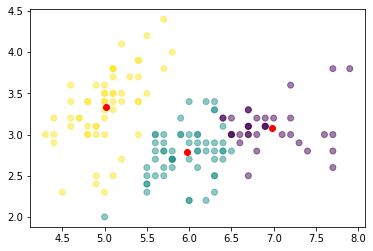

============================================= 실행횟수 10
# 현재 centroids =  [[6.95277778 3.08611111]
 [5.95517241 2.77068966]
 [5.01428571 3.33571429]]


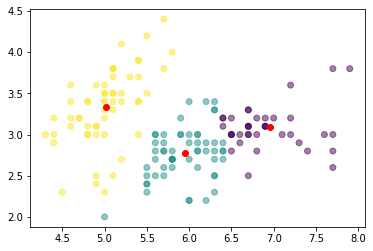

============================================= 실행횟수 11
# 현재 centroids =  [[6.92631579 3.07894737]
 [5.9375     2.76428571]
 [5.01428571 3.33571429]]


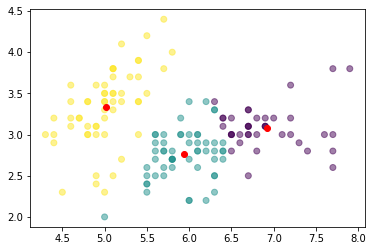

============================================= 실행횟수 12
# 현재 centroids =  [[6.91025641 3.08717949]
 [5.93090909 2.75272727]
 [5.01428571 3.33571429]]


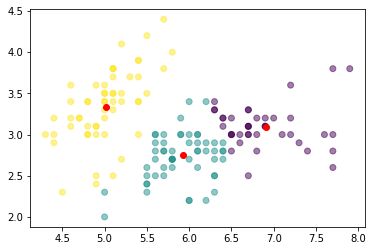

============================================= 실행횟수 13
# 현재 centroids =  [[6.8804878  3.09756098]
 [5.9        2.72407407]
 [5.01454545 3.35454545]]


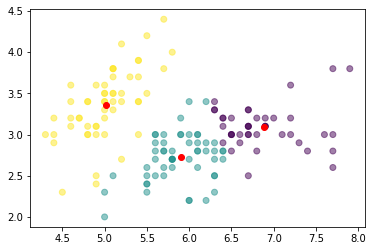

============================================= 실행횟수 14
# 현재 centroids =  [[6.86904762 3.09285714]
 [5.87592593 2.71666667]
 [5.01296296 3.37037037]]


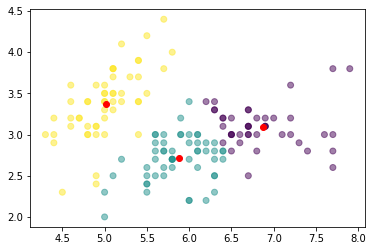

============================================= 실행횟수 15
# 현재 centroids =  [[6.85348837 3.1       ]
 [5.85740741 2.7037037 ]
 [5.00943396 3.38301887]]


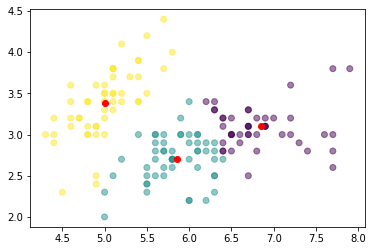

============================================= 실행횟수 16
# 현재 centroids =  [[6.83333333 3.08666667]
 [5.82830189 2.70566038]
 [5.00192308 3.39038462]]


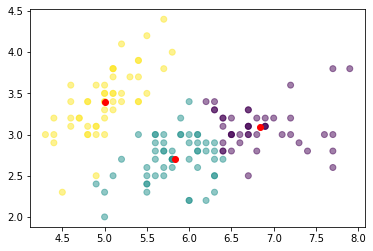

============================================= 실행횟수 17
# 현재 centroids =  [[6.83333333 3.08666667]
 [5.81111111 2.7       ]
 [5.00392157 3.40980392]]


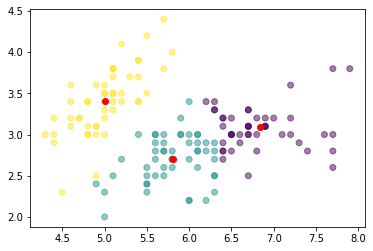

============================================= 실행횟수 18
# 현재 centroids =  [[6.82391304 3.07826087]
 [5.8        2.7       ]
 [5.00392157 3.40980392]]


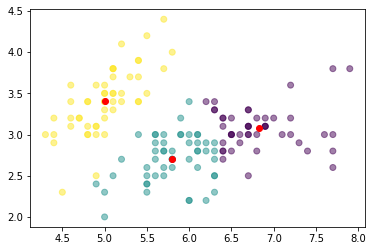

최종 centroids= [[6.82391304 3.07826087]
 [5.8        2.7       ]
 [5.00392157 3.40980392]]
최종 labels= [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1.]


In [ ]:
## 통합버전
#####################################################################
# 비지도학습 : iris 예제 (Full code)
# 알고리즘 따라가기
#####################################################################
# sklearn 라이브러리에 포함된 datasets 모듈에서 아이리스 데이터를 로드.
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import copy
iris = datasets.load_iris()
# sepal length와 width 두 가지 feature만을 사용하도록 하겠음
x = iris.data[:, 0]   # sepal length
y = iris.data[:, 1]   # sepal width
points = iris.data[:, :2]  # x, y 좌표로 표시
k = 3
# 랜덤으로 x, y 좌표 3개를 생성합니다
# np.random.uniform은 주어진 최소, 최대값 사이에서 k 개 만큼 실수 난수를 생성합니다.
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = np.array(list(zip(centroids_x, centroids_y)))
centroids   # 3개의 centroids 포인트 생성
def distance(point, centroid):  # 각 point와 centroid 사이의 거리
    return np.sqrt(((point - centroid)**2).sum())
labels = np.zeros(len(points))  # 모든 점들과 가장 가까운 centroid 번호를 넣을 라벨 array 마련
cnt = 0
while True:
    for i, point in enumerate(points):
        distances = [distance(point, centroids[0]),
                     distance(point, centroids[1]),
                     distance(point, centroids[2])]
        distances = np.array(distances)   # 3개의 centroid와의 거리들
    #     print(distances.argmin())
    #     print(distances)
        labels[i] = distances.argmin()   # 가장 거리가 가까운 centroid의 인덱스
    cnt += 1
    print("============================================= 실행횟수", cnt)
    print("# 현재 centroids = ", centroids)
    plt.scatter(x, y, c=labels, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red')	# centroid는 빨간색으로…
    plt.show()
    centroids_old = copy.deepcopy(centroids)
    for i in range(k):
        centroids[i] = points[labels==i].mean(axis=0)
    if np.all(centroids == centroids_old):
        break
print("="*100)
print("최종 centroids=", centroids)
print("최종 labels=", labels)

In [ ]:
import pandas as pd 
df = pd.DataFrame(labels)
df.value_counts()

1.0    53
2.0    51
0.0    46
dtype: int64

## sklearn cluster 적용

In [ ]:
from sklearn import cluster 
from sklearn.datasets import load_iris 
import numpy as np 

iris = load_iris()
k = len(iris.target_names)

print('kMeans() 군집화 적용')
model = cluster.KMeans(n_clusters = k)
model.fit(iris.data)

labels = model.predict(iris.data)

print('군집화 결과 labels:', labels, sep='\n')

kMeans() 군집화 적용
군집화 결과 labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
a_counts = np.bincount(labels[:50])  # array의 인덱스가 몇번 나오는지 count
b_counts = np.bincount(labels[50:100])
c_counts = np.bincount(labels[100:])
print('a_counts=', a_counts)   # [0, 50] : 0이 0개, 1이 50개
print('b_counts=', b_counts)   # [2, 0, 48] : 0이 2개, 1은 0개, 2는 48개 
print('c_counts=', c_counts)   # [36, 0, 14] : 0이 36개, 1은 0개, 2는 14개


a_counts= [ 0 50]
b_counts= [ 2  0 48]
c_counts= [36  0 14]
